In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [42]:
df.shape

(8425, 23)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [44]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [45]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

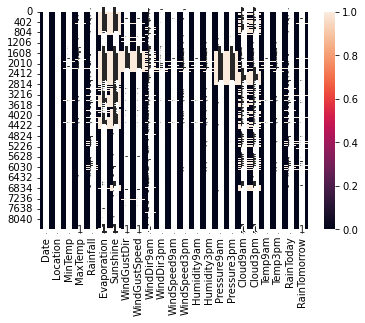

In [46]:
sns.heatmap(df.isnull(), cmap='rocket', annot=True)

In [47]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(5)

,Total,Percent
Sunshine,3994,0.474065
Evaporation,3512,0.416855
Cloud3pm,2455,0.291395
Cloud9am,2421,0.287359
Pressure3pm,1312,0.155727


In [48]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [49]:
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [50]:
from sklearn.preprocessing import LabelEncoder
labeled_df = df.apply(LabelEncoder().fit_transform)

In [51]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [52]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [53]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.9,0.6,NaN,NaN,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.1,0.0,NaN,NaN,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.7,0.0,NaN,NaN,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.0,0.0,NaN,NaN,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.3,1.0,NaN,NaN,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.4,0.0,NaN,NaN,0.0,31.0,9.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.3,0.0,NaN,NaN,6.0,22.0,9.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.9,0.0,NaN,NaN,3.0,37.0,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.0,0.0,NaN,NaN,9.0,28.0,10.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_new = df.copy(deep=True) 
df_new_imputer = IterativeImputer()
df_new.iloc[:, :] = mice_imputer.fit_transform(df)

In [65]:
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.9,0.6,2.648556,6.785248,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,5.079332,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.1,0.0,2.867813,12.300132,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,0.998331,1.613027,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.7,0.0,5.021992,11.955381,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,1.990139,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.0,0.0,3.210674,13.168297,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,0.105811,1.001640,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.3,1.0,2.831062,6.418460,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [66]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1432.000000
Location            5.000000
MinTemp             8.200000
MaxTemp             8.700000
Rainfall            1.200000
Evaporation         4.400000
Sunshine            5.600000
WindGustDir         9.000000
WindGustSpeed      19.531059
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       14.000000
WindSpeed3pm       13.000000
Humidity9am        24.000000
Humidity3pm        24.000000
Pressure9am         8.070073
Pressure3pm         8.000000
Cloud9am            5.000000
Cloud3pm            5.000000
Temp9am             8.100000
Temp3pm             8.300000
RainToday           0.357879
RainTomorrow        0.315423
dtype: float64


In [67]:
df_new = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new.shape

(4919, 23)

In [68]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_new)
modified_data = pd.DataFrame(r_scaler.transform(df_new), index=df_new.index, columns=df_new.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.000000,0.090909,0.516779,0.454829,0.501358,0.364762,0.388872,0.866667,0.536232,0.866667,...,0.6375,0.181818,0.178125,0.238994,0.839291,0.602647,0.483766,0.444444,0.272611,0.198605
1,0.000333,0.090909,0.315436,0.523364,0.365699,0.377252,0.704938,0.933333,0.536232,0.400000,...,0.3000,0.215909,0.268750,0.261006,0.214432,0.220615,0.493506,0.526144,0.272611,0.198605
2,0.000666,0.090909,0.500000,0.542056,0.365699,0.499964,0.685180,1.000000,0.565217,0.866667,...,0.2250,0.272727,0.175000,0.289308,0.302945,0.263265,0.616883,0.490196,0.272611,0.198605
3,0.000999,0.090909,0.375839,0.613707,0.365699,0.396783,0.754694,0.266667,0.246377,0.600000,...,0.3125,0.113636,0.487500,0.418239,0.134779,0.153233,0.522727,0.598039,0.272611,0.198605
4,0.001332,0.090909,0.654362,0.747664,0.591797,0.375158,0.367851,0.866667,0.492754,0.066667,...,0.7750,0.306818,0.275000,0.204403,0.750047,0.924542,0.512987,0.702614,0.272611,0.198605


In [69]:
X = df_new.drop(labels='RainToday',axis=1)
Y = df_new.RainToday
print(X.shape, Y.shape)

(4919, 22) (4919,)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lm=LinearRegression()

In [73]:
lm.fit(X_train,Y_train)

LinearRegression()

In [77]:
pred=lm.predict(X_test)
print("Predicted weather forecasting",pred)
print("Actual weather",Y_test)

Predicted weather forecasting [0.05411512 0.0559162  0.0543442  ... 0.0540715  0.05515868 0.05556944]
Actual weather 585     0.0
8421    0.0
7651    0.0
6384    0.0
5918    0.0
       ... 
4026    0.0
5034    0.0
3816    0.0
1101    0.0
6561    0.0
Name: RainToday, Length: 1476, dtype: float64


In [80]:
X = df_new.drop(labels='RainTomorrow',axis=1)
Y = df_new.RainTomorrow
print(X.shape, Y.shape)

(4919, 22) (4919,)


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm=LinearRegression()

In [85]:
lm.fit(X_train,Y_train)

LinearRegression()

In [87]:
pred=lm.predict(X_test)
print("Predicted weather Tomorrow",pred)
print("Actual weather",Y_test)

Predicted weather Tomorrow [-0.00088056 -0.002575    0.01109299 ... -0.00028396  0.00183301
 -0.00247497]
Actual weather 585     0.0
8421    0.0
7651    0.0
6384    0.0
5918    0.0
       ... 
4026    0.0
5034    0.0
3816    0.0
1101    0.0
6561    0.0
Name: RainTomorrow, Length: 1476, dtype: float64
